<a href="https://colab.research.google.com/github/rimplepate/linkdeln-datajobs/blob/main/LinkedIn_Data_Jobs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
# Load the CSV dataset
df = pd.read_csv("clean_jobs.csv")

In [19]:
# Create SQLite in-memory DB
conn = sqlite3.connect(":memory:")
df.to_sql("linkedin_jobs", conn, index=False, if_exists="replace")


327

In [20]:
# Set seaborn style
sns.set(style="whitegrid")

In [21]:
# --- SQL Queries and Visualizations ---

<ipython-input-22-4ae2e181b810>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=titles_df, y="title", x="job_count", palette="Blues_d")


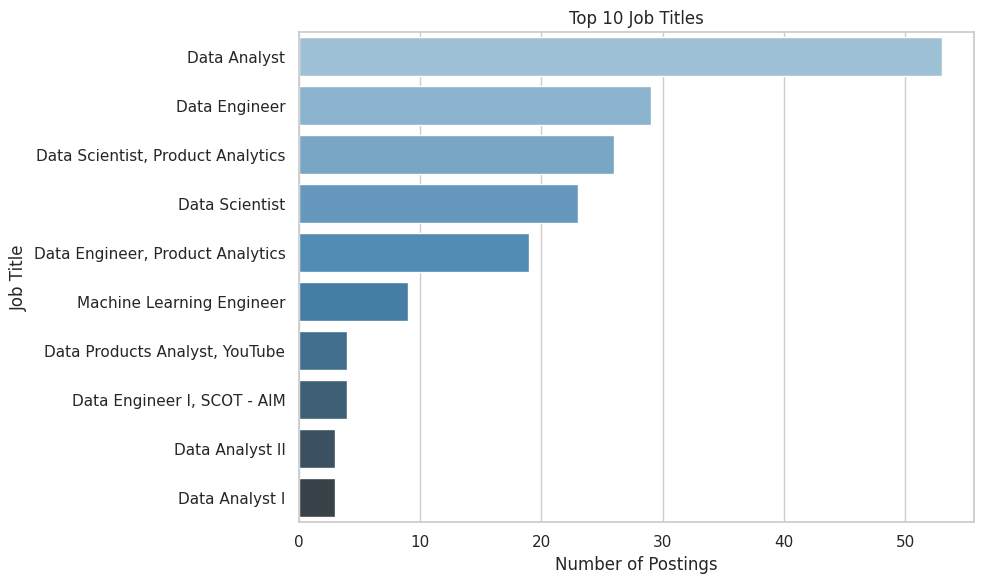

In [22]:
# Top 10 Job Titles
query_titles = """
SELECT title, COUNT(*) AS job_count
FROM linkedin_jobs
GROUP BY title
ORDER BY job_count DESC
LIMIT 10;
"""
titles_df = pd.read_sql_query(query_titles, conn)

plt.figure(figsize=(10, 6))
sns.barplot(data=titles_df, y="title", x="job_count", palette="Blues_d")
plt.title("Top 10 Job Titles")
plt.xlabel("Number of Postings")
plt.ylabel("Job Title")
plt.tight_layout()
plt.show()


<ipython-input-23-59bd5d9eb3c9>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=locations_df, y="location", x="location_count", palette="Greens_d")


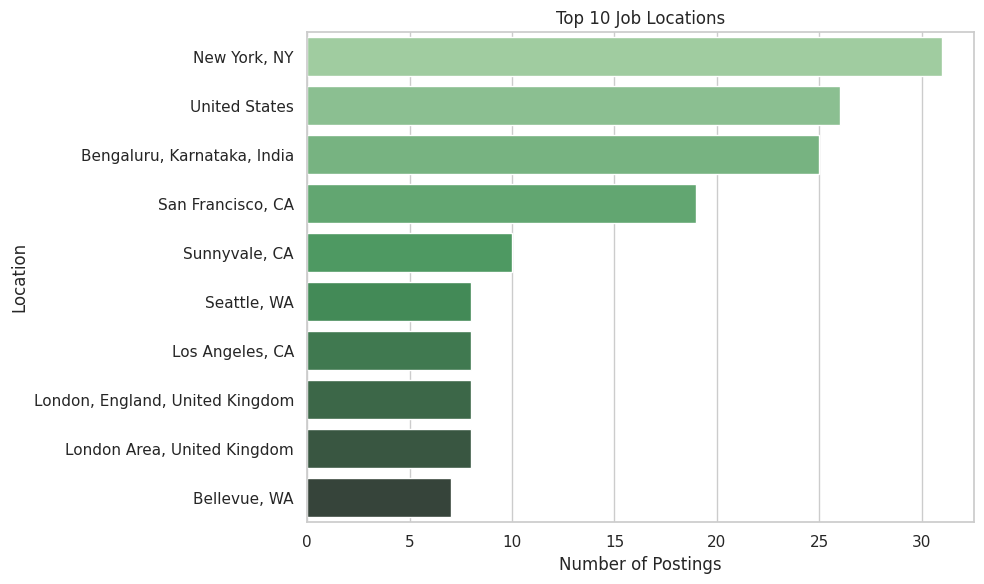

In [23]:
# Top 10 Locations
query_locations = """
SELECT location, COUNT(*) AS location_count
FROM linkedin_jobs
GROUP BY location
ORDER BY location_count DESC
LIMIT 10;
"""
locations_df = pd.read_sql_query(query_locations, conn)

plt.figure(figsize=(10, 6))
sns.barplot(data=locations_df, y="location", x="location_count", palette="Greens_d")
plt.title("Top 10 Job Locations")
plt.xlabel("Number of Postings")
plt.ylabel("Location")
plt.tight_layout()
plt.show()


In [24]:
# Jobs mentioning Python
query_python = """
SELECT title, company, location
FROM linkedin_jobs
WHERE LOWER(description) LIKE '%python%';
"""
python_jobs = pd.read_sql_query(query_python, conn)
print(f"\nNumber of jobs mentioning 'Python': {len(python_jobs)}")
print(python_jobs.head())


Number of jobs mentioning 'Python': 251
             title    company           location
0     Data Analyst       Meta       New York, NY
1     Data Analyst       Meta  San Francisco, CA
2     Data Analyst       Meta    Los Angeles, CA
3     Data Analyst       Meta     Washington, DC
4  Data Analyst II  Pinterest        Chicago, IL


In [25]:
# Close connection
conn.close()